In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
# Read the CSV file with a comma delimiter
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum06/data/Iris.csv')

# Cetak header data (5 baris pertama) dari file
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Pemilihan Fitur

In [7]:
X = df[['SepalLengthCm', 'SepalLengthCm', 'PetalWidthCm']]

#Kolom target (label)
y = df['Species']

In [8]:
X.head()

,SepalLengthCm,SepalLengthCm,PetalWidthCm
0,5.1,5.1,0.2
1,4.9,4.9,0.2
2,4.7,4.7,0.2
3,4.6,4.6,0.2
4,5.0,5.0,0.2


In [9]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


Split dan Bangun Model SVM

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Membuat model svm dengan kernel linear
model = SVC(kernel='linear')

#Melatih model dengan data pelatihan
model.fit(X_train, y_train)
model.fit(X_train, y_train)

SVC(kernel='linear')

Evaluasi Akurasi dan Report Klasifikas

In [11]:
y_pred = model.predict(X_test)
#Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}")
#Laporan klasifikasi
print("Laporan Klasifikasi:", classification_report(y_test, y_pred))


Akurasi: 100.00
Laporan Klasifikasi:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Confusion Matrix


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


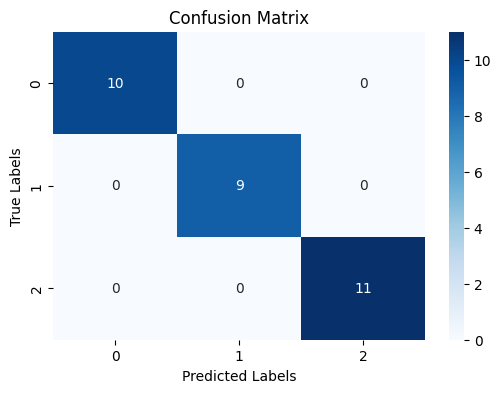

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Visualisasi Hasil Model SVM

<function matplotlib.pyplot.show(close=None, block=None)>

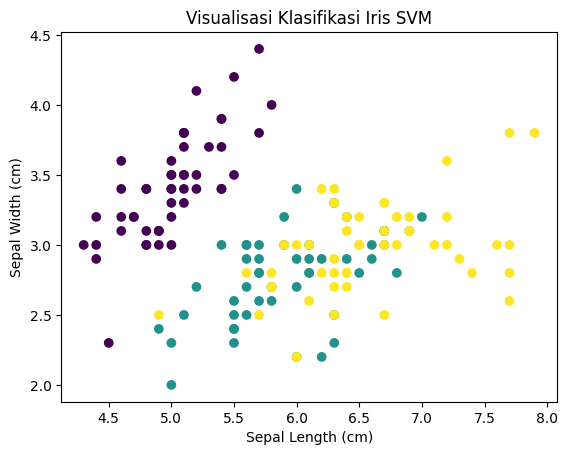

In [13]:
import matplotlib.pyplot as plt

plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Visualisasi Klasifikasi Iris SVM')
plt.show

3D Visualisasi Hasil Model SVM

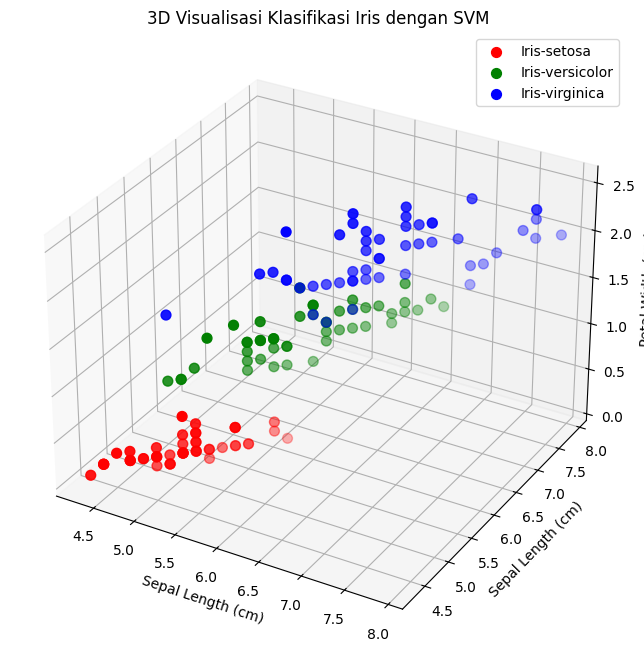

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

#3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

#8. plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

#Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
  subset = df[df['SpeciesEncoded'] == i]
  ax.scatter(
      subset['SepalLengthCm'],
      subset['SepalLengthCm'],
      subset['PetalWidthCm'],
      color=colors[i],
      label=species,
      s=50
  )

  ax.set_xlabel('Sepal Length (cm)')
  ax.set_ylabel('Sepal Length (cm)')
  ax.set_zlabel('Petal Width (cm)')
  ax.set_title('3D Visualisasi Klasifikasi Iris dengan SVM')
  ax.legend()
  plt.show

Praktikum Mandiri

In [73]:
import pandas as pd
# Read the CSV file with a comma delimiter
df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum06/data/smoking_health_data_final.csv')

# Cetak header data (5 baris pertama) dari file
display(df.head())

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3900 non-null   int64  
 1   sex             3900 non-null   object 
 2   current_smoker  3900 non-null   object 
 3   heart_rate      3900 non-null   int64  
 4   blood_pressure  3900 non-null   object 
 5   cigs_per_day    3886 non-null   float64
 6   chol            3893 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


In [75]:
df.describe()

,age,heart_rate,cigs_per_day,chol
count,3900.000000,3900.000000,3886.000000,3893.000000
mean,49.537949,75.688974,9.168554,236.595941
std,8.559275,12.015376,12.037999,44.375365
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


Mengecek Nilai Unik dan Jumlah Kategori

In [76]:
# Nilai unik di kolom target
print(df["current_smoker"].unique())

# Jumlah masing-masing kategori
print(df["current_smoker"].value_counts())

['yes' 'no']
current_smoker
no     1968
yes    1932
Name: count, dtype: int64


Pra-pemrosesan Data (Data Preprocessing)

In [77]:
from sklearn.preprocessing import LabelEncoder

# 1. Ubah kolom teks jadi angka
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])                # Male/Female → 1/0
df["current_smoker"] = le.fit_transform(df["current_smoker"])  # Yes/No → 1/0

# 2. Pisahkan kolom blood_pressure (contoh: '134/80' → 134 & 80)
df[['systolic', 'diastolic']] = df['blood_pressure'].str.split('/', expand=True)
df['systolic'] = pd.to_numeric(df['systolic'], errors='coerce')
df['diastolic'] = pd.to_numeric(df['diastolic'], errors='coerce')

# 3. Hapus kolom blood_pressure lama
df = df.drop(columns=['blood_pressure'])

# 4. Isi nilai kosong (NaN) dengan median
df = df.fillna(df.median(numeric_only=True))

# 5. Cek ulang apakah sudah bersih
print(df.isnull().sum())

age               0
sex               0
current_smoker    0
heart_rate        0
cigs_per_day      0
chol              0
systolic          0
diastolic         0
dtype: int64


Pilih Fitur dan Target

In [78]:
# Fitur (X)
X = df[["age", "sex", "heart_rate", "systolic", "diastolic", "cigs_per_day", "chol"]]

# Target (y)
y = df["current_smoker"]


Split Data (Training & Testing)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Bangun dan Latih Model SVM

In [80]:
from sklearn.svm import SVC

# Buat model
model = SVC(kernel='linear')

# Latih model
model.fit(X_train, y_train)


SVC(kernel='linear')

Evaluasi Akurasi & Laporan Klasifikasi

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi hasil
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi Model: 0.9948717948717949

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       416
           1       1.00      0.99      0.99       364

    accuracy                           0.99       780
   macro avg       1.00      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



Confusion Matrix (Visualisasi)

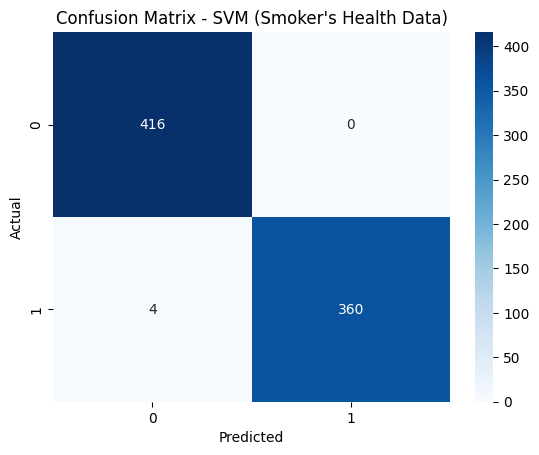

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM (Smoker's Health Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Visualisasi Hasil Model SVM

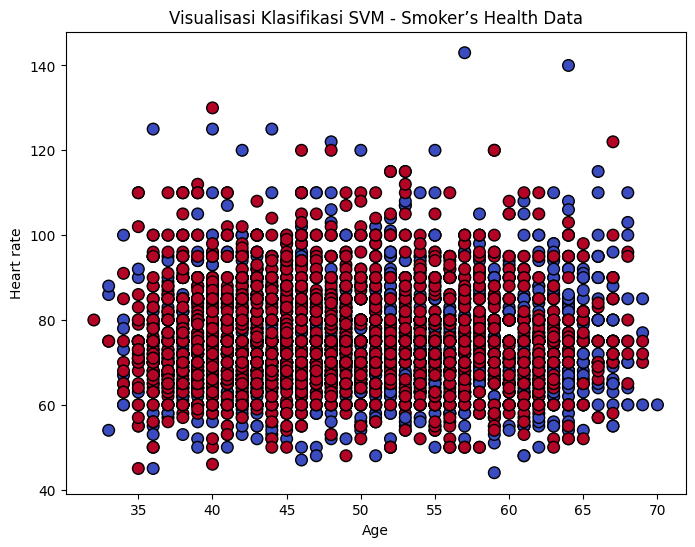

In [83]:
import matplotlib.pyplot as plt

# Pilih dua fitur yang ingin divisualisasikan
x_feature = 'age'
y_feature = 'heart_rate'

# Konversi kolom target ke angka (jika belum)
df['current_smoker_code'] = df['current_smoker'].astype('category').cat.codes

# Plot hasil visualisasi
plt.figure(figsize=(8,6))
plt.scatter(df[x_feature], df[y_feature],
            c=df['current_smoker_code'], cmap='coolwarm', s=70, edgecolors='k')

plt.xlabel(x_feature.capitalize())
plt.ylabel(y_feature.replace('_', ' ').capitalize())
plt.title('Visualisasi Klasifikasi SVM - Smoker’s Health Data')
plt.show()


3D Visualisasi SVM – Smoker’s Health Data

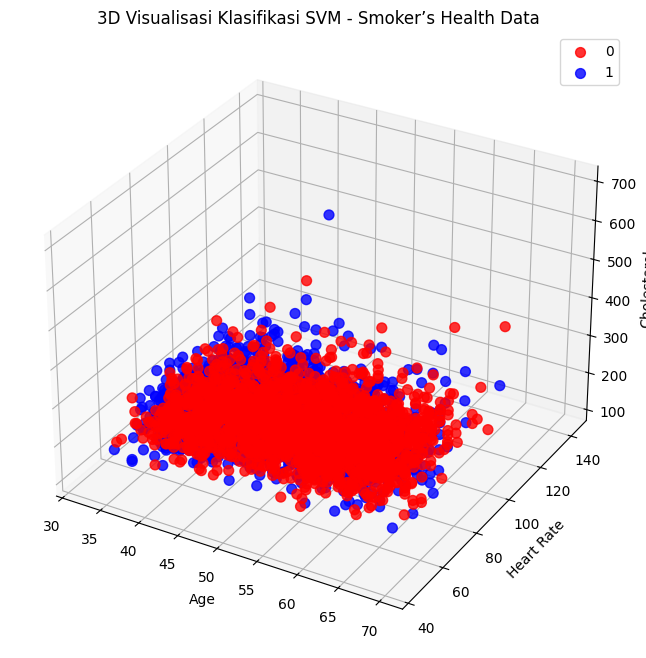

In [84]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SmokerEncoded'] = le.fit_transform(df['current_smoker'])

# 8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'b']
labels = le.classes_

# Plot tiap kelas (perokok & bukan perokok) dengan warna berbeda
for i, smoker_status in enumerate(labels):
    subset = df[df['SmokerEncoded'] == i]
    ax.scatter(
        subset['age'],
        subset['heart_rate'],
        subset['chol'],
        color=colors[i],
        label=smoker_status,
        s=50,
        alpha=0.8
    )

# Label sumbu & judul
ax.set_xlabel('Age')
ax.set_ylabel('Heart Rate')
ax.set_zlabel('Cholesterol')
ax.set_title('3D Visualisasi Klasifikasi SVM - Smoker’s Health Data')
ax.legend()
plt.show()
